In [21]:
import torch
import glob
import os
import numpy as np
import imp
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import pickle
import seaborn as sns
import imp
from IPython.display import display, HTML
from sklearn.mixture import GaussianMixture
from scipy import stats
import json
import shutil
import random

from Prediction import dataset
from Prediction import predictor
from Prediction import detector
from Prediction.detector import Detector_v4, Detector_v3
from Prediction import visualize
from Prediction import calibration as calib
from Prediction.kalman_predict import KalmanPredictor
from Prediction.predictor import HitPredictor
from Prediction.visualize import process_video, get_correction_fn, offline_predictor_visualizer
from Prediction import seq2seq_predict

WEIGHTS_PATH = 'Prediction/Yolo4/yolo4_gs_best_2306.weights'
CFG_PATH = 'Prediction/Yolo4/yolo4_2306.cfg'

## Initialize YOLOv4 detector

In [2]:
det = Detector_v4()

Detector initiated successfully


## Mass update homography matrix

In [2]:
feeding_videos = list(map(lambda x: os.path.join(x, "1950648.avi"), glob.glob("../../Pogona_Pursuit/Arena/output/*feeding*")))

In [698]:
all_json_paths = glob.glob('../../Pogona_Pursuit/Arena/experiments/*/*/rt_data/vid_stats.json')

In [700]:
width=1440
for json_path in all_json_paths:
    with open(json_path, 'r') as f:
        d = json.load(f)
    d.pop('affine_mat')
    if d['width'] == width:
        d['homography'] = h_old.tolist()
    else:
        d['homography'] = None
    
    with open(json_path, 'w') as f:
        json.dump(d, f)

## Move all rt_data folders from previous location

In [44]:
rt_folders = glob.glob("../../Pogona_Pursuit/Arena/experiments/*/*/rt_data")

In [58]:
src_dest = list(map(lambda p: (p, glob.glob(os.path.join(os.path.split(p)[0], "videos","*"))[0]), rt_folders))

In [61]:
for src, dest in src_dest[1:]:
    print(src, dest)
    shutil.move(src, dest)

../../Pogona_Pursuit/Arena/experiments/line_20200803T081735/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/line_20200803T081735/trial1/videos/20200803-081735
../../Pogona_Pursuit/Arena/experiments/line_20200803T082002/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/line_20200803T082002/trial1/videos/20200803-082002
../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082414/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082414/trial1/videos/20200803-082414
../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082724/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082724/trial1/videos/20200803-082724
../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial1/rt_data ../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial1/videos/20200803-084228
../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial2/rt_data ../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial2/video

## Analyze single trial

In [4]:
dataset.analyze_rt_data('../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905', det)


Saved ../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_4_20200830-125905/rt_data/vid_stats.json


## Analyze new trials

In [ ]:
dataset.analyze_new_data(det)

Analyzing ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446:



Saved ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_4_screen_20200830-130446/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348:



Saved ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131348/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916:
ERROR:
Some of the polygons are too close to each other.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding_5_20200830-131916/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-113026/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611:



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400:
ERROR:
Could not find 4 square marks in the image, only 1 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-142400/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132659/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954:
ERROR:
Could not find 4 square marks in the image, only 2 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-132954/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215:
ERROR:
Could not find 4 square marks in the image, only 2 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140215/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding4_20200902-140800/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846:
ERROR:
Could not find 4 square marks in the image, only 3 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/19506468.avi



Saved ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/output/feeding3_20200902-145846/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial1/videos/20200727-080358/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial2/videos/20200727-081031/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial3/videos/20200727-081705/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358/trial4/videos/20200727-082337/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404/trial1/videos/20200727-100404/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial1/videos/20200729-084032/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/cockroach_20200729T084031/trial2/videos/20200729-084703/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T090421/trial1/videos/20200729-090421/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial2/videos/20200729-103756/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/19506468.avi



Saved ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/rt_data/detections.csv
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/rt_data/head_crops.p
 ../../Pogona_Pursuit/Arena/experiments/worm_20200729T103122/trial3/videos/20200729-104429/rt_data/vid_stats.json
Analyzing ../../Pogona_Pursuit/Arena/experiments/fast_cockroach_20200729T105342/trial1/videos/20200729-105345:
ERROR:
Could not find 4 square marks in the image, only 0 found.
Could not calibrate video at ../../Pogona_Pursuit/Arena/experiments/fast_cockroach_20200729T105342/trial1/videos/20200729-105345/19506468.avi


found with brightness: 0, contrast: 3.0


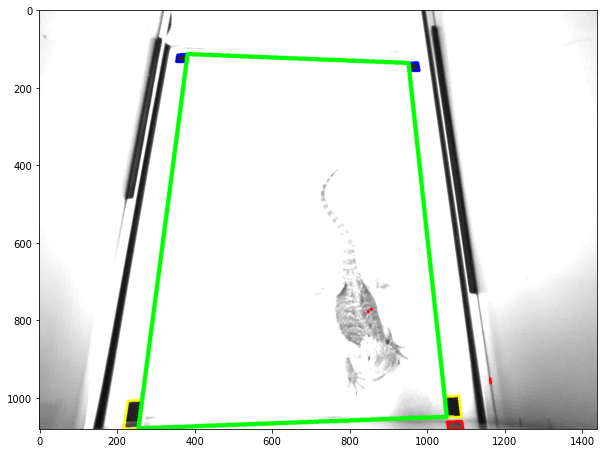

In [7]:
# problematic video (reflection is added to sticker):
# "../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/19506468.avi"
# "../../Pogona_Pursuit/Arena/output/feeding3_20200902-122611/19506468.avi"
vcap = cv.VideoCapture("../../Pogona_Pursuit/Arena/output/feeding3_20200902-122338/19506468.avi")
h, h_im = dataset.get_homography_from_video(vcap, undist_alpha=0)
#h, h_im = dataset.get_homography_from_video(vcap, undist_alpha=0.3, min_near_edge_size=20)
plt.figure(figsize=(10,15))
plt.imshow(h_im)
#plt.imshow(calib.transform_image(h_im, h))

## Analyze videos with custom undistortion alpha
This was necessary when the markings were too close to the edge of the camera frame, but produced some bad results.

In [96]:
paths = [
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial1/videos/20200907-152021",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial2/videos/20200907-152653",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial3/videos/20200907-153326",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T145302/trial1/videos/20200907-145302",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T145302/trial2/videos/20200907-145935",
    "../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T145302/trial3/videos/20200907-150607",
    "../../Pogona_Pursuit/Arena/experiments/circle_20200907T145105/trial1/videos/20200907-145106",
]

In [105]:
for path in paths:
    print(path)
    #dataset.analyze_rt_data(path, det, undist_alpha=0.3, homography_args={"min_near_edge_size": 20})
    #dataset.save_homography_data(path)
    dataset.save_homography_data(path, undist_alpha=0.3, homography_args={"min_near_edge_size": 20})

../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial1/videos/20200907-152021
Could not find homography: Could not find 2 far and 2 near square marks in the image.
../../Pogona_Pursuit/Arena/experiments/cockroach_20200907T152020/trial2/videos/20200907-152653


KeyboardInterrupt: 

# Data collection into a pandas DataFrame

In [11]:
df = dataset.collect_data(data_sources={'detections': True, 'timestamps': True, 'dlc': False, 'touches': True})

47 trials loaded


In [8]:
feeding_data = df.filter(like='feeding',axis=0)

(-316.44971621769344,
 2454.0077225712816,
 -210.37253190773956,
 3411.8167634074675)

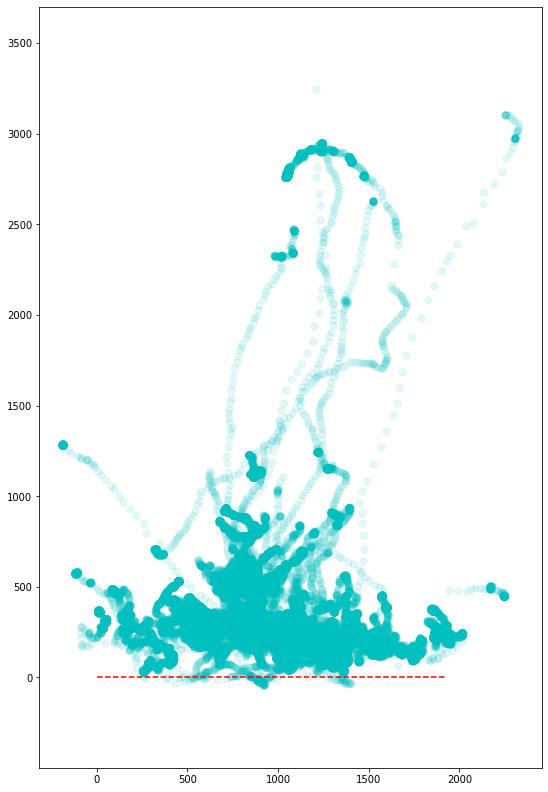

In [9]:
plt.figure(figsize=(9,14))
feeding = df.index.str.contains('feeding') & ~df.index.str.contains('feeding3_20200902-142400_None')
experi =  ~df.index.str.contains('feeding')
#plt.scatter(df[~mask].x2, df[~mask].y2, color='g' ,alpha=0.02)
plt.scatter(df[experi].cent_x, df[experi].cent_y, color='c' ,alpha=0.1,s=50,zorder=2)

#plt.plot(df[mask].x2, df[mask].y2, color='k' ,alpha=0.6,zorder=0)

#trial = np.random.choice(df.index.unique())
#plt.plot(df.loc[trial].x2, df.loc[trial].y2, color='k' ,alpha=0.9,zorder=0)


#sns.jointplot(df.x2, df.y2, kind='hex',)
plt.plot(np.linspace(0,1920,num=10),np.zeros(10),color='r',linestyle='--')
plt.axis('equal')

# Aruco calibration

In [9]:
aruco_paths = glob.glob(os.path.join(dataset.OUTPUT_ROOT,'aruco_test_final*'))
rt_aruco_vids = [os.path.join(p,'19506468.avi') for p in aruco_paths]

In [53]:
for aruco_vid in rt_aruco_vids:
    fname = os.path.split(os.path.split(aruco_vid)[0])[1]
    print(fname)
    visualize.process_video(video_path=aruco_vid,
                            output_path=None,
                           process_fns=[visualize.video_sampler('../aruco_frames/',100,fname)])

aruco_test_final_20200909-175108


## Test the online prediction pipeline

In [3]:
weights_path_encdec = 'Prediction/traj_models/model_20_20_h64_b64_l1_EncDec_6_best.pth'
weights_path_lstmdense = 'Prediction/traj_models/model_20_20_h64_b128_l1_lstmDense_feeding_51_best.pth'
traj_model_encdec = seq2seq_predict.GRUEncDec()
traj_model_lstmdense = seq2seq_predict.LSTMdense(output_seq_size=20,hidden_size=64,LSTM_layers=1, embedding_size=16)
history_len = 20
forecast_horizon = 20

traj_gru = seq2seq_predict.Seq2SeqPredictor(model=traj_model_encdec, 
                                            weights_path=weights_path_encdec,
                                           history_len=history_len, forecast_horizon=forecast_horizon)

traj_lstm = seq2seq_predict.Seq2SeqPredictor(model = traj_model_lstmdense,
                                            weights_path=weights_path_lstmdense,
                                            history_len=history_len,
                                            forecast_horizon=forecast_horizon)

In [4]:
hit_pred = predictor.HitPredictor(trajectory_predictor=traj_lstm,detector=det)

In [5]:
mapping, _, newcammat = calib.get_undistort_mapping(1440,1080)

In [6]:
aruco_img_paths = glob.glob(os.path.join('../aruco_frames','aruco_test_final*'))

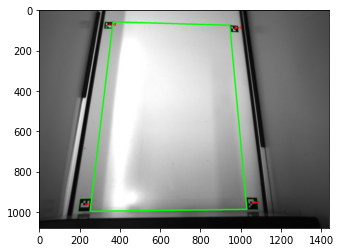

In [30]:
# Creates a new homography file in Arena/calibration
# NOT NECESSARY FOR OTHER TESTS
img = cv.imread(aruco_img_paths[0])
h, h_img, error = hit_pred.calibrate(img)
plt.imshow(h_img)

In [8]:
pog = cv.imread("../pogona_frames/pogona800.jpg")

In [9]:
hit_pred.reset()
for i in range(hit_pred.trajectory_predictor.forecast_horizon):
    print(f"{i}: {hit_pred.handle_frame(pog)}")

0: (None, None, None)
1: (None, None, None)
2: (None, None, None)
3: (None, None, None)
4: (None, None, None)
5: (None, None, None)
6: (None, None, None)
7: (None, None, None)
8: (None, None, None)
9: (None, None, None)
10: (None, None, None)
11: (None, None, None)
12: (None, None, None)
13: (None, None, None)
14: (None, None, None)
15: (None, None, None)
16: (None, None, None)
17: (None, None, None)
18: (None, None, None)
19: (array([[3122.69373647, 3148.02713407, 3122.20493337, 3147.39071479],
       [3122.76229161, 3147.97080788, 3122.43544183, 3147.27285536],
       [3122.78917997, 3148.08124551, 3122.33247127, 3147.31574386],
       [3122.62195282, 3148.05946001, 3122.21989298, 3147.19992201],
       [3122.76374228, 3148.09654173, 3122.26252633, 3147.24496956],
       [3122.68543736, 3148.08375768, 3122.30612003, 3147.18710007],
       [3122.78892687, 3148.0980842 , 3122.34272609, 3147.25048886],
       [3122.71301869, 3148.05018932, 3122.37566055, 3147.28909251],
       [3122.823

# Test HitPredictor with None detections
currently, if there was a frame with no detections the trajectory predictor will return a nan array for as long as this frame is in the history window.

We should probably change this to something smarter.

In [28]:
hit_pred.reset()
detection = hit_pred.detect_pogona_head(pog)
for i in range(hit_pred.trajectory_predictor.forecast_horizon):
    det = detection if random.random() > 0.3 else None
    pred = hit_pred.handle_detection(det)
    print(f"{i}: {pred}, detection: {det}, history_len: {hit_pred.frame_num}")

0: (None, None, None), detection: None, history_len: 1
1: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 2
2: (None, None, None), detection: None, history_len: 3
3: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 4
4: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 5
5: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 6
6: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 7
7: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 8
8: (None, None, None), detection: None, history_len: 9
9: (None, None, None), detection: [3122.64520503 3147.87613856 3122.25926891 3147.52489982], history_len: 10
10: (None, None, None), detection: None, history_len: 11
11: (None, None, None

## Test HitPredictor with offline data around hit

**TODO**: work with actual hit trajectories

In [29]:
df_hits = df[df.hit]
len(df_hits)

40

In [60]:
hits = df_hits[['x1', 'y1', 'x2', 'y2']].values
hits[:,3]

array([ 6.51758332e+01, -4.07620613e-02,  1.14869626e+03, -2.87025477e+01,
        6.80194841e+01,  1.63921977e+01, -7.29470282e+00, -3.25651216e+01,
       -4.16713824e+01, -7.98899904e+00,  5.70554538e+00, -1.42326247e+01,
        6.61659971e+00,  8.35271669e+00, -6.27711638e+00,  8.71258571e+00,
        8.88384712e+00,  6.95714429e+00,  1.93783809e+01,  6.02640772e+00,
       -5.33735637e+01, -5.40618905e+01, -2.71960426e+01,  4.50226163e+01,
       -2.54974718e+01, -3.61470292e+01,  5.44290646e+00,  2.38841003e+01,
       -3.11376783e+01, -4.61410016e+01, -7.96339896e+00, -4.13322990e+00,
       -4.15946079e+01,  5.45529999e+00,  1.17630754e+02,  3.82260420e+01,
        3.43020806e+02, -8.77525925e+01,  2.30602582e+01,  2.52667315e+02])

In [61]:
hit_pred.reset()
det = hits[1]
for i in range(hit_pred.trajectory_predictor.forecast_horizon):
    pred = hit_pred.handle_detection(det)
forecast = pred[0]

In [69]:
pred[0].astype(np.int)

array([[  48,  338, -217,    0],
       [  48,  338, -217,    0],
       [  49,  339, -217,    0],
       [  48,  339, -217,    0],
       [  49,  339, -217,    0],
       [  48,  339, -217,    0],
       [  49,  339, -217,    0],
       [  48,  339, -217,    0],
       [  49,  338, -217,    0],
       [  48,  338, -217,    0],
       [  48,  338, -217,    0],
       [  48,  338, -217,    0],
       [  49,  338, -217,    0],
       [  48,  338, -217,    0],
       [  48,  338, -217,    0],
       [  49,  339, -217,    0],
       [  48,  338, -217,    0],
       [  48,  338, -217,    0],
       [  48,  338, -217,    0],
       [  48,  338, -217,    0]])

In [71]:
pred[1:]

(-84.16365967550364, 0)

In [57]:
forecast[:,2]

array([-16.82229961, -16.59179115, -16.69476171, -16.80734   ,
       -16.76470664, -16.72111295, -16.68450689, -16.65157243,
       -16.75234525, -16.77400959, -16.60730231, -16.71133719,
       -16.73428593, -16.81634923, -16.6956466 , -16.82698819,
       -16.88331274, -16.87866658, -16.89303418, -16.83918629])